Classification project using Heart dataset.EDA

#Importing data,library

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving heart.csv to heart (1).csv


In [ ]:
!pip install pandas numpy scikit-learn matplotlib seaborn
!pip install pandas numpy scikit-learn matplotlib seaborn
import pandas as pd
import numpy as np
import sklearn
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
import numpy as np
import pandas as pd
# Get the data
df = pd.read_csv('heart.csv')

#EDA

In [ ]:
# Review the data
df.head()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [ ]:
# Check the data size and type
df.info()

In [ ]:
# Check for missing values
df.isnull().sum()

In [ ]:
df.shape

In [ ]:
#Separating the columns in categorical and continuous
cat_cols = ['sex','exng','caa','cp','fbs','restecg','slp','thall']
con_cols = ["age","trtbps","chol","thalachh","oldpeak"]
target_col = ["output"]
print("The categorial cols are : ", cat_cols)
print("The continuous cols are : ", con_cols)
print("The target variable is :  ", target_col)

In [ ]:

df[con_cols].describe().transpose()

In [ ]:
df.corr()

In [ ]:
sns.pairplot(df, hue='output')
plt.show()

In [ ]:
pip install pandas-profiling

In [ ]:
from pandas_profiling import ProfileReport
prof = ProfileReport(df)
prof.to_file(output_file='output.html')

In [ ]:
df.columns

#Pre-processing

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler


# Separate the target variable from the features
X = df.drop('output', axis=1)  # Features (all columns except 'output')
y = df['output']  # Target variable

# Split the data into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler = StandardScaler()
X_train[con_cols] = scaler.fit_transform(X_train[con_cols])
X_test[con_cols] = scaler.transform(X_test[con_cols])
from sklearn.preprocessing import StandardScaler

# Instantiate the StandardScaler
scaler = StandardScaler()

# Fit the scaler on the training data and transform training and testing data
X_train[con_cols] = scaler.fit_transform(X_train[con_cols])
X_test[con_cols] = scaler.transform(X_test[con_cols])
X_train.head()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall
132,-1.356798,1,1,-0.616856,0.914034,0,1,0.532781,0,-0.920864,2,0,2
202,0.385086,1,0,1.169491,0.439527,0,0,-1.753582,1,-0.193787,2,0,3
196,-0.921327,1,2,1.169491,-0.300704,0,1,-0.139679,0,2.350982,1,0,2
75,0.058483,0,1,0.276318,0.059921,0,0,0.487950,0,0.351521,1,0,2
176,0.602822,1,0,-0.795490,-0.319684,1,1,0.443119,1,0.351521,2,2,3


(array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13]),
 [Text(1, 0, 'age'),
  Text(2, 0, 'sex'),
  Text(3, 0, 'cp'),
  Text(4, 0, 'trtbps'),
  Text(5, 0, 'chol'),
  Text(6, 0, 'fbs'),
  Text(7, 0, 'restecg'),
  Text(8, 0, 'thalachh'),
  Text(9, 0, 'exng'),
  Text(10, 0, 'oldpeak'),
  Text(11, 0, 'slp'),
  Text(12, 0, 'caa'),
  Text(13, 0, 'thall')])

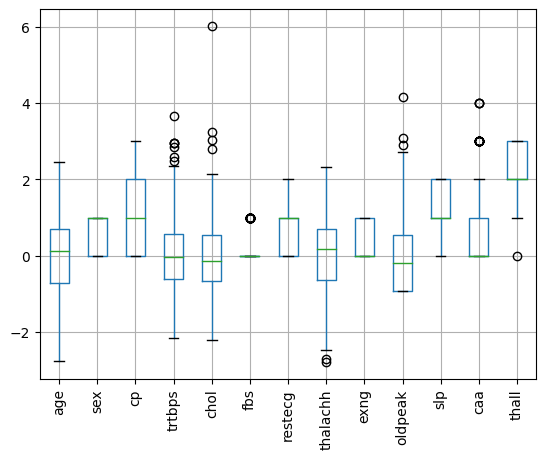

In [ ]:
import matplotlib.pyplot as plt
X_train.boxplot()
plt.xticks(rotation=90)

Aim : minimize the chances of missing individuals who could potentially suffer from a heart attack ie maximizing recall

#Logistic Regression

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score


# Create and train the logistic regression model
logreg = LogisticRegression()
logreg.fit(X_train, y_train)

# Make predictions on the testing set
y_pred = logreg.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# Print classification report and confusion matrix for more detailed evaluation
print("Classification Report:")
print(classification_report(y_test, y_pred))

print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

Accuracy: 0.8688524590163934
Classification Report:
              precision    recall  f1-score   support

           0       0.86      0.86      0.86        29
           1       0.88      0.88      0.88        32

    accuracy                           0.87        61
   macro avg       0.87      0.87      0.87        61
weighted avg       0.87      0.87      0.87        61

Confusion Matrix:
[[25  4]
 [ 4 28]]


In [ ]:
# Evaluate the model's performance
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
auc_score = roc_auc_score(y_test, logreg.predict_proba(X_test)[:, 1])

# Print the evaluation metrics
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1-score:", f1)
print("AUC score :", auc_score)

Accuracy: 0.8688524590163934
Precision: 0.875
Recall: 0.875
F1-score: 0.875
AUC score : 0.9245689655172414


#SVM

In [ ]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, roc_auc_score

# Load or define your data (X_train, y_train, X_test, y_test)

# Create a SVM model with probability estimates enabled
svm_classifier = SVC(probability=True)

# Define the hyperparameter grid to search
param_grid = {
    'kernel': ['linear', 'poly', 'rbf'],
    'C': [0.1, 1, 10, 100],
    'gamma': ['scale', 'auto', 0.1, 1]
}

# Create a grid search object with cross-validation (5-fold)
grid_search = GridSearchCV(svm_classifier, param_grid, cv=5)

# Perform grid search on the training data
grid_search.fit(X_train, y_train)

# Get the best hyperparameter values
best_params = grid_search.best_params_
print("Best hyperparameters:", best_params)

# Use the best hyperparameters to create the final SVM model
best_svm_classifier = SVC(**best_params, probability=True)
best_svm_classifier.fit(X_train, y_train)

# Make predictions on the testing set using the best model
y_pred = best_svm_classifier.predict(X_test)

# Evaluate the model with the best hyperparameters
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
auc_score = roc_auc_score(y_test, best_svm_classifier.predict_proba(X_test)[:, 1])

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1-score:", f1)
print("Confusion Matrix:")
print(conf_matrix)
print("AUC Score:", auc_score)


Best hyperparameters: {'C': 1, 'gamma': 'scale', 'kernel': 'linear'}
Accuracy: 0.8688524590163934
Precision: 0.875
Recall: 0.875
F1-score: 0.875
Confusion Matrix:
[[25  4]
 [ 4 28]]
AUC Score: 0.9213362068965518


#KNN

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix


# Create a KNN model
knn = KNeighborsClassifier()

# Define the hyperparameter grid to search
param_grid = {'n_neighbors': [13,15,17,19,21,25,39,40,41,50]}

# Create a grid search object with cross-validation (5-fold in this example)
grid_search = GridSearchCV(knn, param_grid, cv=5)

# Perform grid search on the training data
grid_search.fit(X_train, y_train)

# Get the best hyperparameter value
best_k = grid_search.best_params_['n_neighbors']
print("Best 'k' value:", best_k)

# Use the best 'k' value to create the final KNN model
best_knn = KNeighborsClassifier(n_neighbors=best_k)
best_knn.fit(X_train, y_train)

# Make predictions on the testing set using the best model
y_pred = best_knn.predict(X_test)

# Evaluate the model with the best 'k' value
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
auc_score = roc_auc_score(y_test, best_knn.predict_proba(X_test)[:, 1])


print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1-score:", f1)
print("Confusion Matrix:")
print(conf_matrix)
print("AUC :", auc_score)

Best 'k' value: 40
Accuracy: 0.8688524590163934
Precision: 0.875
Recall: 0.875
F1-score: 0.875
Confusion Matrix:
[[25  4]
 [ 4 28]]
AUC : 0.9181034482758621


#DT

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix


# Create a Decision Tree model
dt_classifier = DecisionTreeClassifier()

# Define the hyperparameter grid to search
param_grid = {
    'criterion': ['gini', 'entropy'],          # Splitting criterion
    'max_depth': [None,5, 10, 15,16,17,18,19,20],       # Maximum depth of the tree
    'min_samples_split': [2, 5, 10],          # Minimum number of samples required to split an internal node
    'min_samples_leaf': [1, 2,4,5,6,7,8,9]             # Minimum number of samples required to be at a leaf node
}

# Create a grid search object with cross-validation (5-fold in this example)
grid_search = GridSearchCV(dt_classifier, param_grid, cv=5)

# Perform grid search on the training data
grid_search.fit(X_train, y_train)

# Get the best hyperparameters
best_params = grid_search.best_params_
print("Best hyperparameters:", best_params)

# Use the best hyperparameters to create the final Decision Tree model
best_dt_classifier = DecisionTreeClassifier(**best_params)
best_dt_classifier.fit(X_train, y_train)

# Make predictions on the testing set using the best model
y_pred = best_dt_classifier.predict(X_test)

# Evaluate the model with the best hyperparameters
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
auc_score = roc_auc_score(y_test, best_dt_classifier.predict_proba(X_test)[:, 1])



print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1-score:", f1)
print("Confusion Matrix:")
print(conf_matrix)
print("AUC :", auc_score)

#RF

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix


# Create a Random Forest model
rf_classifier = RandomForestClassifier(random_state=42)

# Define the hyperparameter grid to search
param_grid = {
    'n_estimators': [50, 100, 150],           # Number of trees in the forest
    'max_depth': [None, 10, 20],               # Maximum depth of the trees
    'min_samples_split': [2, 5, 10],           # Minimum number of samples required to split an internal node
    'min_samples_leaf': [1, 2, 4]              # Minimum number of samples required to be at a leaf node
}

# Create a grid search object with cross-validation (5-fold in this example)
grid_search = GridSearchCV(rf_classifier, param_grid, cv=5)

# Perform grid search on the training data
grid_search.fit(X_train, y_train)

# Get the best hyperparameter values
best_params = grid_search.best_params_
print("Best hyperparameters:", best_params)

# Use the best hyperparameters to create the final Random Forest model
best_rf_classifier = RandomForestClassifier(**best_params, random_state=42)
best_rf_classifier.fit(X_train, y_train)

# Make predictions on the testing set using the best model
y_pred = best_rf_classifier.predict(X_test)

# Evaluate the model with the best hyperparameters
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
auc_score = roc_auc_score(y_test, best_rf_classifier.predict_proba(X_test)[:, 1])

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1-score:", f1)
print("Confusion Matrix:")
print(conf_matrix)
print("AUC :",auc_score)

Best hyperparameters: {'max_depth': None, 'min_samples_leaf': 4, 'min_samples_split': 10, 'n_estimators': 50}
Accuracy: 0.8524590163934426
Precision: 0.8709677419354839
Recall: 0.84375
F1-score: 0.8571428571428571
Confusion Matrix:
[[25  4]
 [ 5 27]]
AUC : 0.9256465517241379


#XGBoost

In [ ]:
!pip install scikit-optimize

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 100.3/100.3 kB 1.9 MB/s eta 0:00:00


In [ ]:
from xgboost import XGBClassifier
from skopt import BayesSearchCV
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix


In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, roc_auc_score
from xgboost import XGBClassifier
from skopt import BayesSearchCV

# Define the search space for Bayesian Optimization
search_spaces = {
    'n_estimators': (50, 150),
    'max_depth': (3, 7),
    'learning_rate': (0.001, 0.1, 'log-uniform'),
    'subsample': (0.8, 1.0),
    'colsample_bytree': (0.8, 1.0),
}

# Create an XGBoost classifier
xgb_classifier = XGBClassifier()

# Perform Bayesian Optimization for hyperparameter tuning
bayes_search = BayesSearchCV(xgb_classifier, search_spaces, n_iter=30, cv=5, n_jobs=-1)
bayes_search.fit(X_train, y_train)

# Get the best hyperparameters found during tuning
best_params = bayes_search.best_params_

# Train the XGBoost model with the best hyperparameters
xgb_classifier_best = XGBClassifier(**best_params)
xgb_classifier_best.fit(X_train, y_train)

# Make predictions on the testing data using the best model
y_pred = xgb_classifier_best.predict(X_test)

# Evaluate the performance of the best XGBoost model
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)

# Calculate AUC score
auc_score = roc_auc_score(y_test, xgb_classifier_best.predict_proba(X_test)[:, 1])

print("Best Hyperparameters:", best_params)
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1-score:", f1)
print("Confusion Matrix:")
print(conf_matrix)
print("AUC Score:", auc_score)


#Voting-

In [ ]:
from sklearn.ensemble import VotingClassifier
# Create a Voting Classifier
voting_classifier = VotingClassifier(
    estimators=[
        ('logreg',logreg ),
        ('random_forest', best_rf_classifier),
        ('xgboost', xgb_classifier_best),
        ('svm',best_svm_classifier),
        ('knn', best_knn)
    ],
    voting='soft'  # You can choose 'hard' or 'soft' voting
)

# Train the Voting Classifier
voting_classifier.fit(X_train, y_train)

# Make predictions on the testing set using the Voting Classifier
y_pred = voting_classifier.predict(X_test)

# Evaluate the Voting Classifier's performance
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
auc_score = roc_auc_score(y_test, voting_classifier.predict_proba(X_test)[:, 1])

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1-score:", f1)
print("Confusion Matrix:")
print(conf_matrix)
print("AUC Score:", auc_score)

Accuracy: 0.8688524590163934
Precision: 0.8529411764705882
Recall: 0.90625
F1-score: 0.8787878787878787
Confusion Matrix:
[[24  5]
 [ 3 29]]
AUC Score: 0.9364224137931035
